# Scene アニメーション

Scene を使うと、メッシュオブジェクトのアニメーションを行うことができる

## Scene の基本

https://makie.juliaplots.org/stable/tutorials/scenes/

**Scene constructor:**

```julia
scene = Scene(;
    # clear everything behind scene
    clear = true,
    # the camera struct of the scene.
    visible = true,
    # ssao and light are explained in more detail in `Documetation/Lighting`
    ssao = Makie.SSAO(),
    # Creates lights from theme, which right now defaults to `
    # set_theme!(lightposition=:eyeposition, ambient=RGBf(0.5, 0.5, 0.5))`
    lights = Makie.automatic,
    backgroundcolor = :gray,
    resolution = (500, 500);
    # gets filled in with the currently set global theme
    theme_kw...
)
```

- Scene の機能:
    - その Scene に属するすべてのプロットオブジェクトに適用されるローカルテーマ（位置、回転、拡大率等）を保持する
    - カメラ、投影、変換行列を管理する
    - ウィンドウサイズを定義する
        - Sub Scene の場合、ウィンドウ領域を親領域より小さくすることができる
    - すべてのウィンドウイベントへの参照を保持する

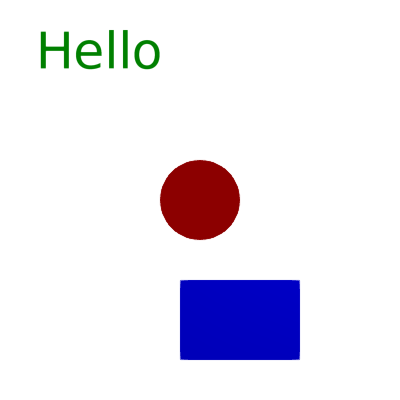

In [1]:
using GLMakie

# 400x400 サイズの Scene 作成
parent = Scene(resolution = (400, 400))

"""
    mesh(primitive::GeometryBasics.GeometryPrimitive; kwargs...)

メッシュオブジェクトの描画

Scene の座標系は、中心を (x, y) = (0.0, 0.0) として
    left: x = -1.0, right: x = +1.0, top: y = +1.0, bottom: y = -1.0
となっている
"""

"""
    Circle(point::Point, radius::Number)

円メッシュ
"""
# 円の描画: Scene 中心に半径 0.2 の円を描画する
circle = Scene(parent)
mesh!(circle, Circle(Point2f(0.0, 0.0), 0.2); color = :red)

"""
    Rect2(x::Number, y::Number, width::Number, height::Number)

矩形メッシュ

- width:
    - 負値を指定すると x 位置から左方向に abs(width) 分伸びる
    - 正値を指定すると x 位置から右方向に abs(width) 分伸びる
- height:
    - 負値を指定すると y 位置から下方向に abs(height) 分伸びる
    - 正値を指定すると y 位置から上方向に abs(height) 分伸びる
"""
# 矩形の描画: (left=-0.1, right=0.5, top=-0.4, bottom=-0.8) 位置に矩形を描画
rect = Scene(parent)
mesh!(rect, Rect2(-0.1, -0.4, 0.6, -0.4); color = :blue)

"""
    text(string::String; ...kwargs)

文字列の描画
"""
# 文字列の描画: (-0.8, 0.8) 位置に "Hello" を描画
txt = Scene(parent)
text!(txt, "Hello"; position = (-0.8, 0.6), textsize = 50, color = :green)

parent

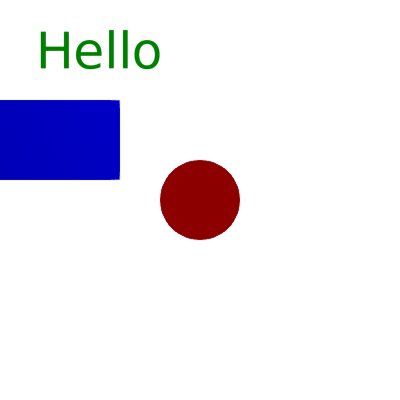

In [2]:
"""
    translate!(scene::Scene, dx::Number, dy::Number)

Scene の位置を動かす

- dx, dy は、Scene の初期位置からの差分を指定する
- 初期位置が (-0.1, -0.4) で translate(-0.9, 0.9) を指定した場合:
    - translate 後の位置は (-1.0, 0.5) となる
"""
# 矩形メッシュを (-1.0, 0.5) の位置に動かす
translate!(rect, -0.9, 0.9)
parent

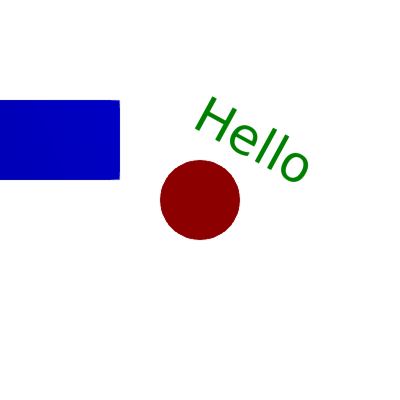

In [3]:
"""
    rotate!(scene::Scene, rot_axis::Vec3, rotation::Number)

Scene に絶対回転を適用する

- rot_axis: 回転軸を指定
    - 2D Scene の場合は、基本的にz軸中心に回すことになるため Vec3(0, 0, 1) を指定
- rotation: 回転率を指定
    - z軸中心に回す場合:
        - `-0.5`: 時計回りに45°
        - `0.5`: 反時計周りに45°
"""
# 文字列メッシュをz軸中心時計回りに45°回転させる
rotate!(txt, Vec3(0, 0, 1), -0.5)
parent

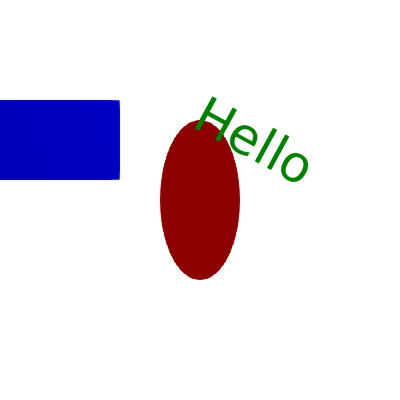

In [4]:
"""
    scale!(scene::Scene, dx::Number, dy::Number)

Scene を拡大・縮小する

- dx, dy は初期サイズからの拡大率
    - 1.0 で等倍
    - 0.5 で半分の大きさ
    - 2.0 で倍の大きさ
"""
# 円メッシュを (1.0, 2.0) 倍の大きさにする
scale!(circle, 1.0, 2.0)
parent